In [60]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [48]:
!pip3 install snap-stanford
!pip3 install numpy scipy matplotlib seaborn

In [0]:
import snap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log10

In [0]:
G1 = snap.LoadEdgeList(snap.PNGraph, "/content/drive/My Drive/CS224W Stanford: Machine Learning in Graphs/hw0/wiki-Vote.txt", 0, 1)

In [52]:
degrees = dict()
for node in G1.Nodes():
    degree = node.GetOutDeg()
    if degree not in degrees:
        degrees[degree] = 1
    else:
        degrees[degree] += 1

print(len(degrees.items()))

238


In [0]:
list_degrees = list(degrees.items())[:]
list_degrees.sort(reverse=True)

In [54]:
list_degrees.pop()

(0, 1005)

In [55]:
list_degrees[0], list_degrees[-2]

((893, 1), (2, 704))

In [0]:
num_degrees = []
count_degrees = []

for num_degree, count_degree in list_degrees:
    num_degrees.append(num_degree)
    count_degrees.append(count_degree)

In [0]:
log_num_degrees = list(map(log10, num_degrees))
log_count_degrees = list(map(log10, count_degrees))

[(0.0, 3.0)]

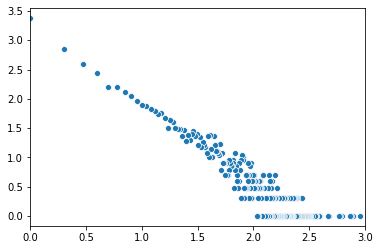

In [58]:
ax = sns.scatterplot(log_num_degrees, log_count_degrees)
ax.set(xlim=(0, log10(1000)))

In [59]:
z = np.polyfit(log_num_degrees, log_count_degrees, 1)
z

array([-1.28106471,  3.1324547 ])

# Problem 3


In [0]:
G2 = snap.LoadEdgeList(snap.PNGraph, "/content/drive/My Drive/CS224W Stanford: Machine Learning in Graphs/hw0/stackoverflow-Java.txt", 0, 1)

In [66]:
Components = snap.TCnComV()
snap.GetWccs(G2, Components)
print("The number of weakly connected components:", len(Components))

The number of weakly connected components: 10143


In [70]:
MxWcc = snap.GetMxWcc(G2)
print("The number of edges:", sum(1 for _ in MxWcc.Edges()))
print("The number of nodes:", sum(1 for _ in MxWcc.Nodes()))

The number of edges: 322486
The number of nodes: 131188


In [75]:
def print_top_3(dictionary):
    items = []
    for item in dictionary:
        items.append((PRankH[item], item))

    items.sort(reverse=True)
    for i in range(3):
        print(items[i][1], items[i][0])

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [76]:
PRankH = snap.TIntFltH()
snap.GetPageRank(G2, PRankH)
# items = []
# for item in PRankH:
#     items.append((PRankH[item], item))

# items.sort(reverse=True)
# for i in range(3):
#     print(items[i][1], items[i][0])

print_top_3(PRankH)

992484 0.013980540412209575
135152 0.010005538895741885
22656 0.007103532693128619


In [80]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(G2, NIdHubH, NIdAuthH)

print("Top 3 hubs:")
print_top_3(NIdHubH)
print()

print("Top 3 authorities:")
print_top_3(NIdAuthH)

Top 3 hubs:
992484 0.013980540412209575
135152 0.010005538895741885
22656 0.007103532693128619

Top 3 authorities:
992484 0.013980540412209575
135152 0.010005538895741885
22656 0.007103532693128619
